In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import sim.automata as atm
import analysis.analysis as ans
import analysis.stats as stats
from sim.rules import Rules

from machine_learning.q_learning_agents import QLearningAgent
from machine_learning.state import State

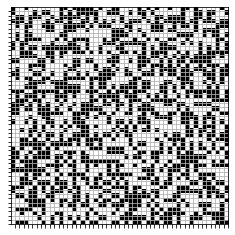

In [60]:
np.random.seed(0)
init_state = State(atm.get_random_state((50, 50)), Rules.CONWAY)
#print(init_state)
ans.plot_state(init_state.values)

In [61]:
# we need to define an action function to obtain the legal actions, which would involve placing
# anywhere that is not alive on the board.

# then, how to evaluate said action

action_func = lambda state: np.arange(state.shape[0]*state.shape[1])[state.flat == 0]
reward_func = lambda state: (state.values == 1).sum()

In [11]:
from tqdm import tqdm, trange

In [63]:
def run(init_state, action_func, reward_func, episode_length = 10, num_training = 100, num_testing = 100):
    agent = QLearningAgent(action_func = action_func, reward_func = reward_func, num_training = num_training)
    
    state = init_state.copy()
    
    train_rewards = []
    test_rewards = []
    
    pbar = tqdm(total = agent.num_training + num_testing)
    while agent.episodes_so_far < agent.num_training + num_testing:
        
        agent.start_episode()
        for i in range(episode_length):
            _ = agent.observe_function(state)
            
            action = agent.get_action(state)
            agent.do_action(state, action)
            
            state = state.get_successor(action)
        
        agent.stop_episode()
        
        if agent.is_in_training():
            train_rewards += [agent.accum_train_rewards]
        else:
            test_rewards += [agent.accum_test_rewards]
            
        pbar.update(1)
    pbar.close()
    
    
    plt.plot(np.arange(agent.num_training-1), train_rewards)
    plt.plot(np.arange(agent.num_training, agent.num_training + num_testing + 1), test_rewards)
    plt.show()
    
    
    return agent

In [ ]:
agent = run(init_state, action_func, reward_func, num_training = 200, num_testing = 200)

 18%|███████████████▏                                                                   | 73/400 [02:50<12:51,  2.36s/it]

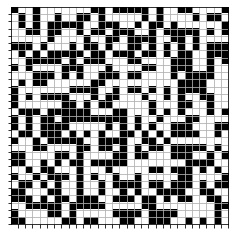

In [19]:
ans.plot_state(init_state.values)

In [41]:
if agent.is_in_training():
    print(f"{agent.episodes_so_far}. Train Rewards: {agent.accum_train_rewards}")
else:
    print(f"{agent.episodes_so_far}. Test Rewards: {agent.accum_test_rewards}")

20. Test Rewards: 12.0
